In [3]:
library(Matrix)
library(scatterplot3d)
source("senet.R")

paras=list(
  px=50,
  py=10,
  n=200,
  lambda1=1,
  lambda2=100,
  noise.signal = 0.25,
  noise.response = 10
)
px=paras$px
py=paras$py
betastar=sapply(1:px,twobump,px)
#betastar=sin(2*pi*(1:px)/px)

ctr=list(L = 1,
         use.gram = TRUE,
         maxiter = 10000, 
         tol = 1e-8,
         init = NULL,
         sigma = 0.9)

In [6]:
l1s=c(0,1,10,100,1000,10000)
l2s=c(0,1,10,100,1000,10000)
l1s=1000
l2s=1000
lys=(0:10)/10
ns=(1:10)*100

#lys=c(0,0.25,0.5,0.75,1) #(0:10)/10 #


df=NULL
for(i1 in 1:length(l1s)){
  for(i2 in 1:length(l2s)){
      for(i3 in 1:length(lys)){
          for(i4 in 1:length(ns)){
               df=rbind(df,c(i1,i2,i3,i4,l1s[i1],l2s[i2],lys[i3],ns[i4]))
          }
      }
  }
}
colnames(df)=c("id1","id2","id3","id4","lambda1","lambda2","lambdaly","n")

In [7]:
resm=matrix(0,nrow(df),2)
for(jobid in 1:nrow(df)){
 #fname=paste0("./results/px50py10beta_lag_3_one_bump_cor_ly/n",df[jobid,"n"],"px",paras$px,"py",paras$py,"job",jobid,"T","beta_lag_3_one_bump_cor")
 fname=paste0("./results/px50py10/n",df[jobid,"n"],"px",paras$px,"py",paras$py,"job",jobid,"T","0")
 load(paste0(fname,".RData"))
 resm[jobid,1]=norm(slist$input$B-slist$output$Bhat,"f")
 resm[jobid,2]=slist$output$rmse_test   
}

In [8]:
df=cbind(df,resm)
colnames(df)=c("id1","id2","id3","id4","lambda1","lambda2","lambdaly","n","coef_error","pred_rmse_test")

In [15]:
#head(df,20)

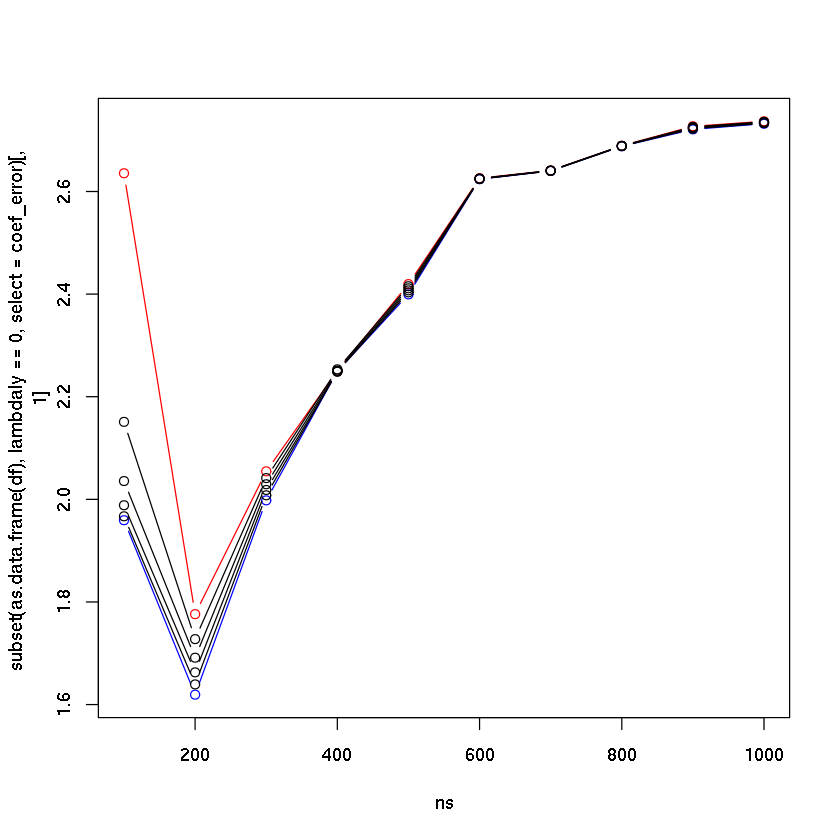

In [10]:
plot(ns,subset(as.data.frame(df),lambdaly==0,select=coef_error)[,1],col="blue",type="b",ylim=c(min(df[,"coef_error"]),max(df[,"coef_error"])))
points(ns,subset(as.data.frame(df),lambdaly==1,select=coef_error)[,1],col="red",type="b")

# points(ns,subset(as.data.frame(df),lambdaly==0.25,select=coef_error)[,1],type="b")
# points(ns,subset(as.data.frame(df),lambdaly==0.5,select=coef_error)[,1],type="b",col="black")
# points(ns,subset(as.data.frame(df),lambdaly==0.75,select=coef_error)[,1],type="b",col="yellow")

points(ns,subset(as.data.frame(df),lambdaly==0.2,select=coef_error)[,1],type="b")
points(ns,subset(as.data.frame(df),lambdaly==0.4,select=coef_error)[,1],type="b")
points(ns,subset(as.data.frame(df),lambdaly==0.6,select=coef_error)[,1],type="b")
points(ns,subset(as.data.frame(df),lambdaly==0.8,select=coef_error)[,1],type="b")
# points(ns,subset(as.data.frame(df),lambdaly==0.1,select=coef_error)[,1],type="b")
# points(ns,subset(as.data.frame(df),lambdaly==0.3,select=coef_error)[,1],type="b")
# points(ns,subset(as.data.frame(df),lambdaly==0.5,select=coef_error)[,1],type="b")
# points(ns,subset(as.data.frame(df),lambdaly==0.7,select=coef_error)[,1],type="b")
# points(ns,subset(as.data.frame(df),lambdaly==0.9,select=coef_error)[,1],type="b")

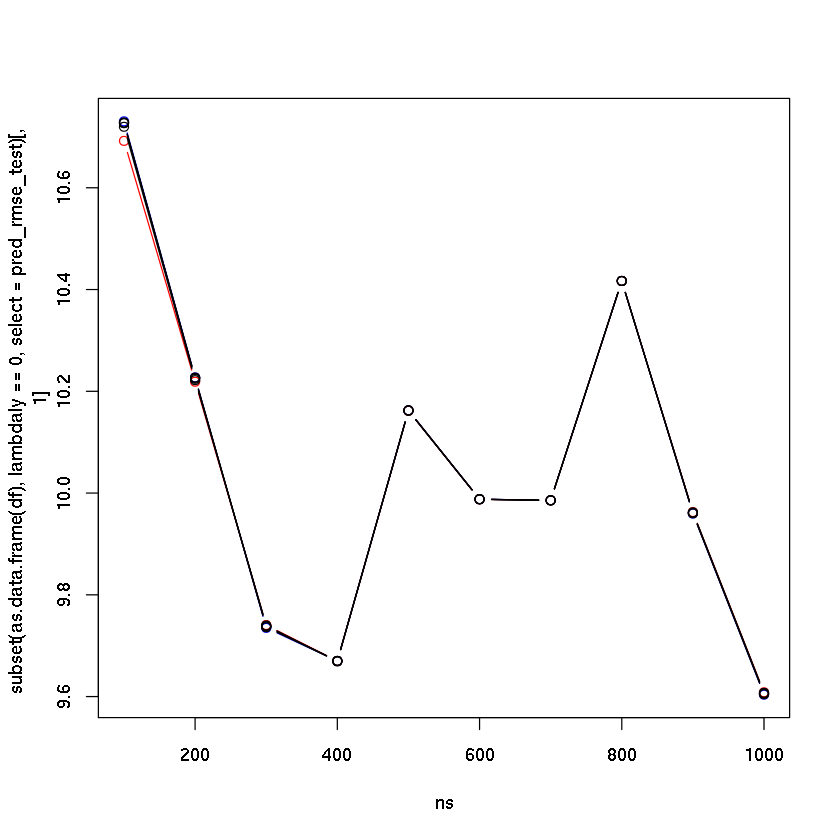

In [11]:
plot(ns,subset(as.data.frame(df),lambdaly==0,select=pred_rmse_test)[,1],col="blue",type="b",ylim=c(min(df[,"pred_rmse_test"]),max(df[,"pred_rmse_test"])))
points(ns,subset(as.data.frame(df),lambdaly==1,select=pred_rmse_test)[,1],col="red",type="b")

# points(ns,subset(as.data.frame(df),lambdaly==0.25,select=pred_rmse_test)[,1],type="b")
# points(ns,subset(as.data.frame(df),lambdaly==0.5,select=pred_rmse_test)[,1],type="b")
# points(ns,subset(as.data.frame(df),lambdaly==0.75,select=pred_rmse_test)[,1],type="b")

points(ns,subset(as.data.frame(df),lambdaly==0.2,select=pred_rmse_test)[,1],type="b")
points(ns,subset(as.data.frame(df),lambdaly==0.4,select=pred_rmse_test)[,1],type="b")
points(ns,subset(as.data.frame(df),lambdaly==0.6,select=pred_rmse_test)[,1],type="b")
points(ns,subset(as.data.frame(df),lambdaly==0.8,select=pred_rmse_test)[,1],type="b")

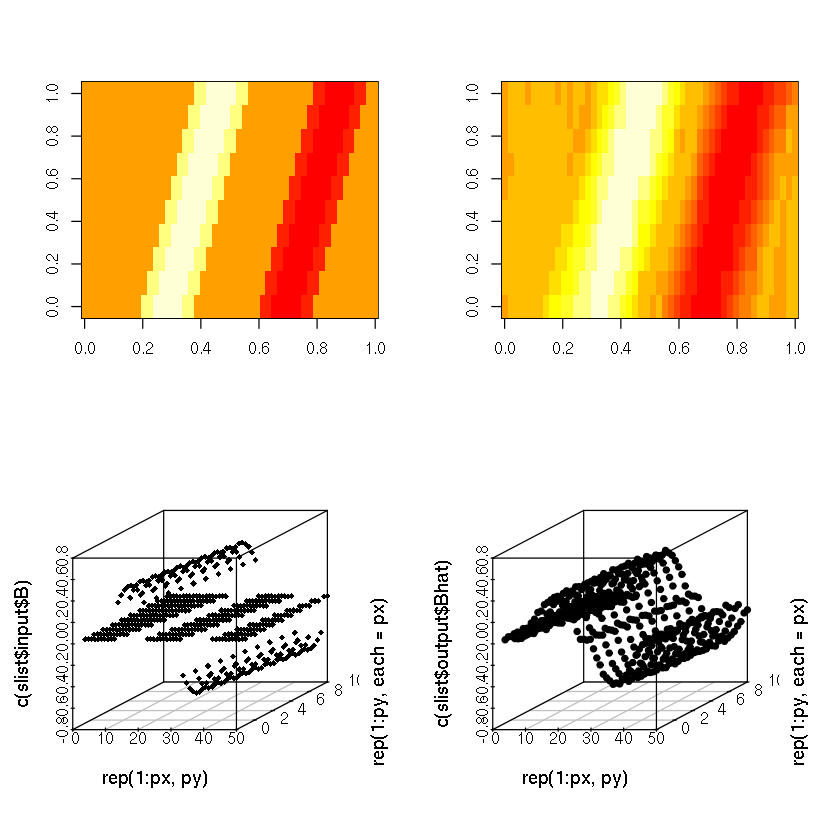

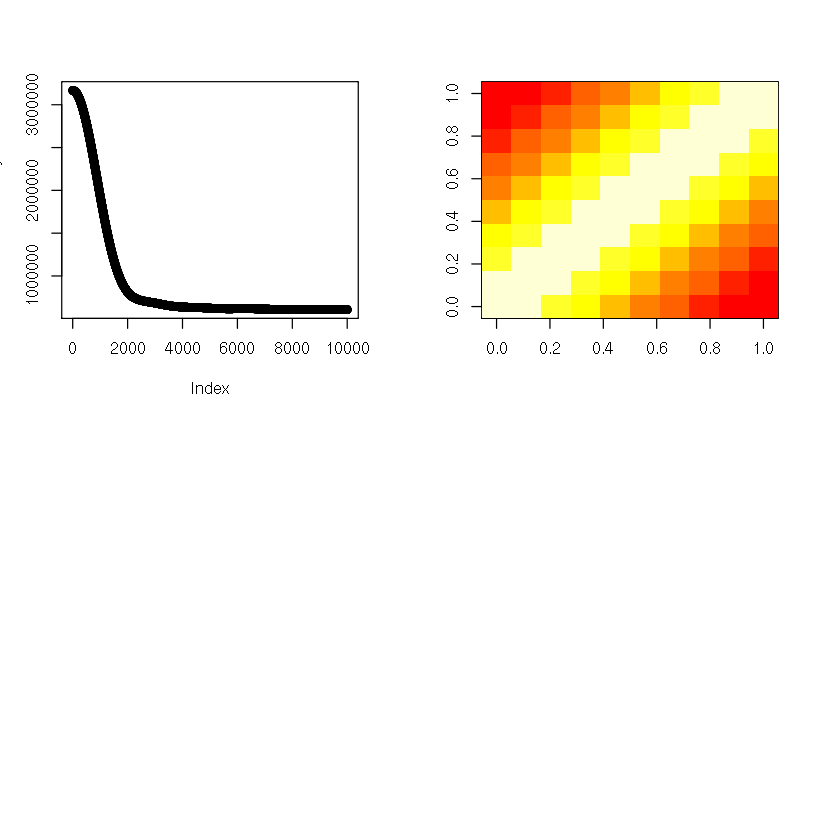

In [12]:
load("./results/px50py10/n500px50py10job5T0.RData")
#image(cor(t(slist$input$B)))
par(mfrow=c(2,2))
image(slist$input$B)
image(slist$output$Bhat)
scatterplot3d(rep(1:px,py),rep(1:py,each=px),c(slist$input$B),pch=18)
scatterplot3d(rep(1:px,py),rep(1:py,each=px),c(slist$output$Bhat),pch=19)
plot(slist$fit$obj)
image(cor(slist$input$B))

In [12]:
px=50
py=10

In [38]:
slist$fit$obj

[1] 4612868 4612845

In [18]:
resm=matrix(0,nrow(df),3)
for(jobid in 1:nrow(df)){
 fname=paste0("./results/px50py10/n",paras$n,"px",paras$px,"py",paras$py,"job",jobid,"T","1")
 load(paste0(fname,".RData"))
 resm[jobid,1]=norm(slist$input$B-slist$output$Bhat,"F")
 fname=paste0("./results/px50py10/n",paras$n,"px",paras$px,"py",paras$py,"job",jobid,"T","2")
 load(paste0(fname,".RData"))
 resm[jobid,2]=norm(slist$input$B-slist$output$Bhat,"F")
 fname=paste0("./results/px50py10/n",paras$n,"px",paras$px,"py",paras$py,"job",jobid,"T","3")
 load(paste0(fname,".RData"))
 resm[jobid,3]=norm(slist$input$B-slist$output$Bhat,"F")
}

Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file './results/px50py10/n200px50py10job1T1.RData', probable reason 'No such file or directory'”

ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection
